**segment the ATLAS dataset using raw unet model**  

Steps:
1. get dataset, make dataloaders object
2. make model
3. train model
4. evaluate model

# 1. get dataset, make dataloader

In [1]:
import nibabel as nb
from matplotlib import pyplot as plt
import helper_atlas as helper

root_dir = r'H:\DATASETs\ATLAS_R2.0\ATLAS_2\Training'.replace("\\", "/")
dataset = helper.ATLAS_Dataset(root_dir) # this is 3D dataset
sliced_dataset = helper.ATLAS_Sliced_Dataset(root_dir)

In [2]:
# dataset shapes and sizes
print(len(dataset), len(dataset[0]), dataset[0][0].shape, dataset[0][1].shape)

#sliced dataset
print(len(sliced_dataset), len(sliced_dataset[0]), sliced_dataset[500][0].shape, sliced_dataset[0][1].shape)


655 2 torch.Size([189, 233, 197]) torch.Size([189, 233, 197])
123795 2 torch.Size([1, 256, 256]) torch.Size([1, 256, 256])


In [ ]:
# picking image from the sliced dataset
img = sliced_dataset[2100][0]
plt.imshow(img, cmap="gray") # a slice out of the sliced dataset

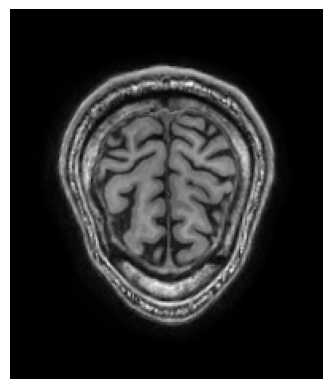

In [5]:
# extracting data from dataset
img = dataset[30][0]
mask =  dataset[30][1]

helper.slice_with_mask(img, mask, xslice=50)

In [4]:
# create dataloader
# dataloader will be made based on the sliced_dataset
from torch.utils.data import random_split
import torchvision.transforms as transforms

# test train split
train_size = int(0.85 * len(sliced_dataset))
test_size = len(sliced_dataset) - train_size
train_dataset, test_dataset = random_split(sliced_dataset, [train_size, test_size])

# dataloader
from torch.utils.data import DataLoader

BATCH_SIZE= 32

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
a = next(iter(train_dataloader))
len(train_dataloader)

3289

In [6]:
print(len(a)) # a tuple of 2 elements
print(a[0].shape) # holds a batch of 2D input
print(a[1].shape) # holds the corresponding batch of 2D output mask

2
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])


# 2. make model
model is on models.py file

In [7]:
from models import UNet
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
unet_model = UNet().to(device)

# 3 train model

In [8]:
import helper_test_train
import torch.nn as nn
import torch

train_model = helper_test_train.train_model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=unet_model.parameters(), lr=0.1)

train_model(unet_model, loss_fn, optimizer, train_dataloader, epochs=3, device=device)


training in epoch:  0
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])
torch.Size([32, 1, 256, 256])


KeyboardInterrupt: 